In [168]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [169]:
path = "../../build/gpu/benchmark/"

In [170]:
# Data from Clausing's paper: The Flow of Highly Rarefied Gases through Tubes of Arbitrary Length (1971) 
# https://doi.org/10.1116/1.1316379
data_clausing = [1, 0.9524, 0.9092, 0.8699, 0.8341, 0.8013, 0.7711,
0.7434, 0.7177, 0.6940, 0.6720, 0.6514, 0.6320, 0.6139, 0.5970, 0.5810,
0.5659, 0.5518, 0.5384, 0.5256, 0.5136, 0.4914, 0.4711, 0.4527, 0.4359,
0.4205, 0.4062, 0.3931, 0.3809, 0.3695, 0.3589, 0.3146, 0.2807, 0.2537,
0.2316, 0.2131, 0.1973, 0.1719, 0.1523, 0.1367, 0.1240, 0.1135, 0.0797,
0.0613, 0.0499, 0.0420, 0.0363, 0.0319, 0.0285, 0.0258, 0.002658]
lr_clausing = np.arange(0, 2.1, 0.1)
lr_clausing = np.append(lr_clausing, np.arange(2.2, 4.1, 0.2))
lr_clausing = np.append(lr_clausing, np.arange(5.0, 10.1, 1.0))
lr_clausing = np.append(lr_clausing, np.arange(12.0, 20.1, 2.0))
lr_clausing = np.append(lr_clausing, np.arange(30, 100.1, 10.0))
lr_clausing = np.append(lr_clausing, [1000])

In [171]:
# 10.1088/0034-4885/49/10/001
data_steckelmacher = """ 0.2 0.4 0.6 0.8 1 2 4 5 10 20 50 100 
0.9092 0.8341 0.7711 0.7177 0.6720 0.5136 0.3589 0.3146 0.1973 0.1135 0.0499 0.0258 
0.90922 0.83408 0.77115 0.71779 0.67198 0.51423 0.35658 0.31053 0.19099 0.10932 0.048517 0.02529  
0.909215028 0.834080661 0.771149758 0.717785082 0.671983902  0.514230527  0.35657225  0.31052462 0.190941 0.109304  0.048448  0.025258  
"""
data_steckelmacher = np.genfromtxt(data_steckelmacher.splitlines())

In [172]:
# Data from Greenwood: The correct and incorrect generation of a cosine distribution of scattered particles for Monte-Carlo modelling of vacuum systems (2002)
# https://doi.org/10.1016/S0042-207X(02)00173-2
greenwood_data_str = """
0.001 10000000 0.99949 0.00001 0.99968 0.00001 0.02
0.01 10000000 0.99505 0.00005 0.99680 0.00006 0.18
0.03 10000000 0.9853 0.0001 0.9907 0.0001 0.54
0.1 10000000 0.9522 0.0002 0.9693 0.0001 1.8
0.3 10000000 0.8702 0.0003 0.9148 0.0002 5.1
1 10000000 0.6718 0.0005 0.7688 0.0003 14.4
3 10000000 0.4183 0.0004 0.5449 0.0004 30
10 1000000 0.188 0.001 0.2939 0.0013 56
30 1000000 0.076 0.001 0.137 0.001 82
100 10000 0.025 0.002 0.050 0.002 99
300 10000 0.011 0.001 0.021 0.001 93
1000 10000 0.0028 0.0003 0.0083 0.0005 196
"""
greenwood_data = np.genfromtxt(greenwood_data_str.splitlines())
gw_data = greenwood_data[:,2]
# fit a spline to the Greenwood data for smoother curves
spline = UnivariateSpline(np.log(greenwood_data[:,0]), gw_data, s=0)

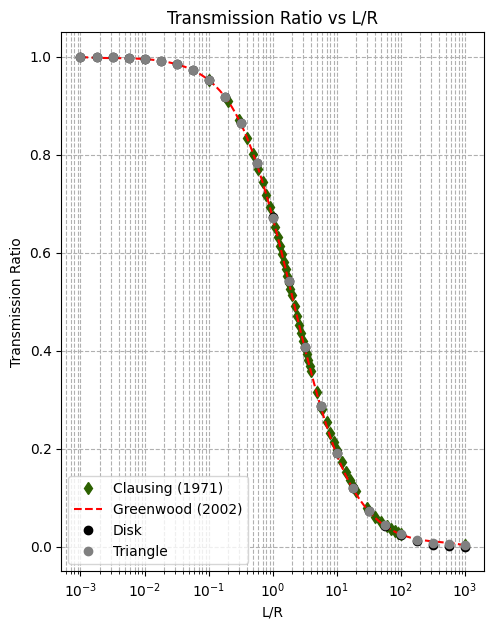

In [173]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)

# plt.plot(data_steckelmacher[0, :], data_steckelmacher[1, :], 'd', label='Clausing (1932)', color="#2C6100")
plt.plot(lr_clausing, data_clausing, 'd', label='Clausing (1971)', color="#2C6100")
# plt.plot(data_steckelmacher[0, :], data_steckelmacher[2, :], 'd', label='De Marcus (1957)', color="#72018B")
# plt.plot(data_steckelmacher[0, :], data_steckelmacher[3, :], 'd', label='Cole (1977)', color="#005D97")

lr_fine = np.logspace(-3, 3, 100)
gw_smooth = spline(np.log(lr_fine)) 
plt.plot(lr_fine, gw_smooth, '--', label='Greenwood (2002)', color='red')

data = np.genfromtxt(path + 'transmission_log_CPU_disk.txt', skip_header=1)
transmission_ratio = data[:, 1] / (data[:, 1] + data[:, 2])
plt.plot(data[:, 0], transmission_ratio, 'o', label='Disk', color="black")

data = np.genfromtxt(path + 'transmission_log_GPU_tri.txt', skip_header=1)
transmission_ratio = data[:, 1] / (data[:, 1] + data[:, 2])
plt.plot(data[:, 0], transmission_ratio, 'o', label='Triangle', color="gray")

plt.xscale('log')
# plt.yscale('log')
plt.xlabel('L/R')
plt.ylabel('Transmission Ratio')
plt.title('Transmission Ratio vs L/R')
# plt.ylim(0.01, 1)
# plt.xlim(0.1, 100)
plt.legend(loc="lower left")
plt.grid(True, which="both", ls="--")   

plt.savefig('transmission_ratio.png', dpi=300)

plt.show()

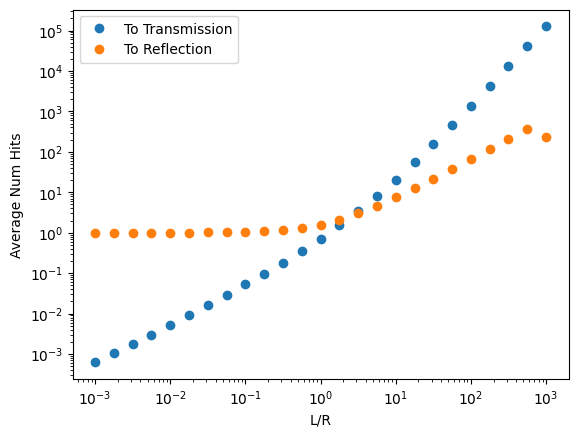

In [174]:
data = np.genfromtxt(path + 'transmission_log_GPU_tri.txt', skip_header=1)
hits_to_transmission = data[:, 3] / data[:, 1]
hits_to_reflection = data[:, 4] / data[:, 2]
lr = data[:, 0]

plt.plot(lr, hits_to_transmission, 'o', label='To Transmission')
plt.plot(lr, hits_to_reflection, 'o', label='To Reflection')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('L/R')
plt.ylabel('Average Num Hits')
plt.legend()
plt.show()